In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.seasonal import seasonal_decompose
import fbprophet

/Users/arnavkundu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


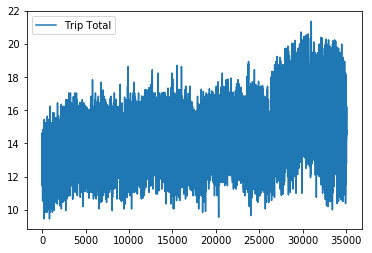

In [2]:
df = pd.read_csv("Data/merged.csv")
temp = df[['date','hour','Fare','Trip Total','Trip Seconds']].groupby(['date','hour'],as_index=False).agg({'Fare':'median',\
                                                                                              'Trip Total':'median',\
                                                                                              'Trip Seconds':'median'})
fig=plt.figure(figsize=(20,10))
temp[['Trip Total']].plot()

In [3]:
temp.head()

,date,hour,Fare,Trip Total,Trip Seconds
0,2013-01-01,0,12.25,13.525,780.0
1,2013-01-01,1,13.15,14.250,840.0
2,2013-01-01,2,13.05,14.650,870.0
3,2013-01-01,3,13.35,14.500,840.0
4,2013-01-01,4,13.25,14.300,780.0


In [4]:
fare_dm=temp[["date","hour","Trip Total"]]
fare_dm["date_time"]=pd.to_datetime(fare_dm["date"]+" "+fare_dm["hour"].astype(str)+":00:00")
print(fare_dm.head())

         date  hour  Trip Total           date_time
0  2013-01-01     0      13.525 2013-01-01 00:00:00
1  2013-01-01     1      14.250 2013-01-01 01:00:00
2  2013-01-01     2      14.650 2013-01-01 02:00:00
3  2013-01-01     3      14.500 2013-01-01 03:00:00
4  2013-01-01     4      14.300 2013-01-01 04:00:00


/Users/arnavkundu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
ts=fare_dm[["date_time","Trip Total"]]

In [6]:
ts = ts.set_index(pd.DatetimeIndex(ts['date_time']))

In [7]:
ts.drop(columns="date_time")

,Trip Total
date_time,
2013-01-01 00:00:00,13.5250
2013-01-01 01:00:00,14.2500
2013-01-01 02:00:00,14.6500
2013-01-01 03:00:00,14.5000
2013-01-01 04:00:00,14.3000
2013-01-01 05:00:00,13.6500
2013-01-01 06:00:00,13.0500
2013-01-01 07:00:00,11.4500
2013-01-01 08:00:00,12.4500


/Users/arnavkundu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  after removing the cwd from sys.path.
/Users/arnavkundu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  """


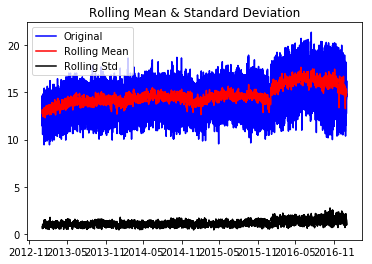

Results of Dickey-Fuller Test:
Test Statistic                -7.077641e+00
p-value                        4.756103e-10
#Lags Used                     5.200000e+01
Number of Observations Used    3.500700e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64


In [8]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window = 24)
    rolstd = pd.rolling_std(timeseries, window = 24)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts["Trip Total"])

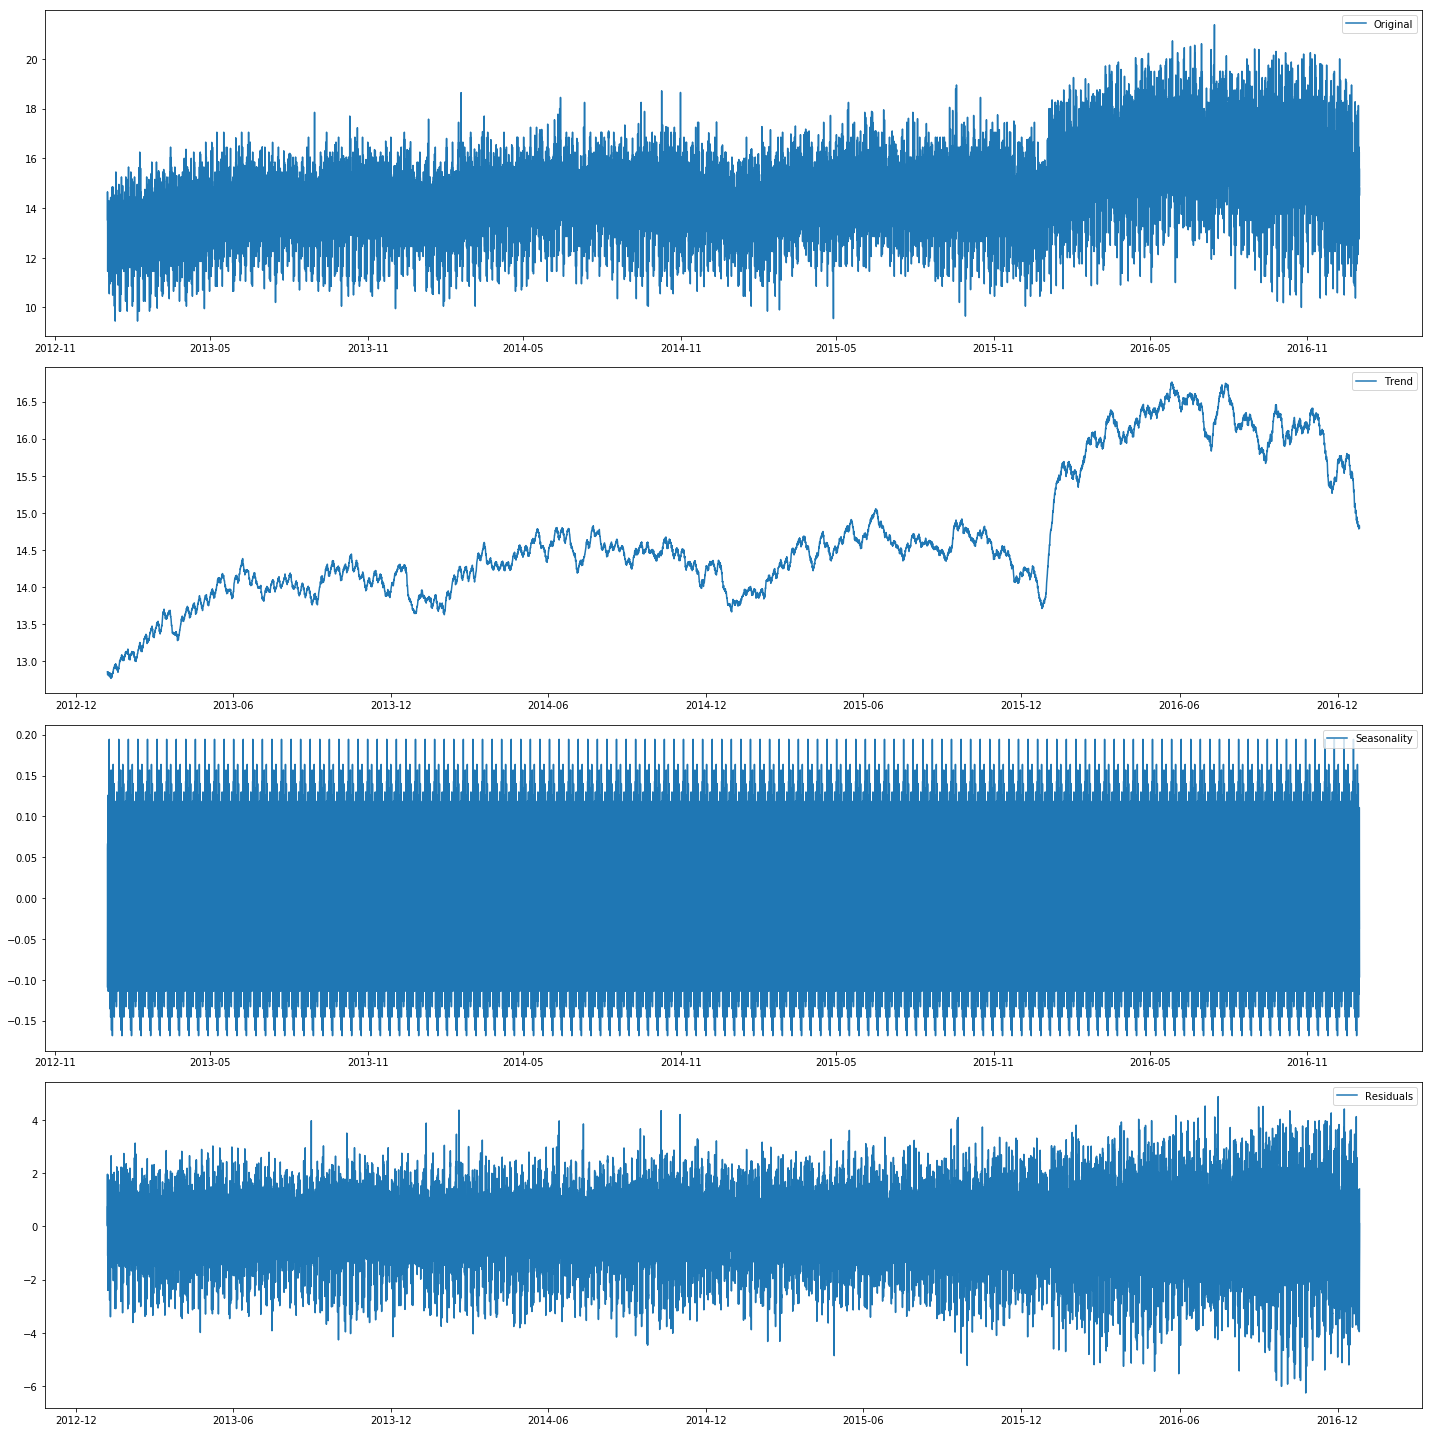

In [9]:
decomposition = seasonal_decompose(ts["Trip Total"],freq=268,model='additive')

decomposition = pd.DataFrame({'trend':decomposition.trend,\
                              'seasonal':decomposition.seasonal,\
                              'residual':decomposition.resid})

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.residual
fig=plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(ts["Trip Total"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
model = fbprophet.Prophet() #instantiate Prophet
ts["y"]=ts["Trip Total"]
ts["ds"]=ts.index
model.fit(ts); #fit the model with your dataframe

/Users/arnavkundu/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


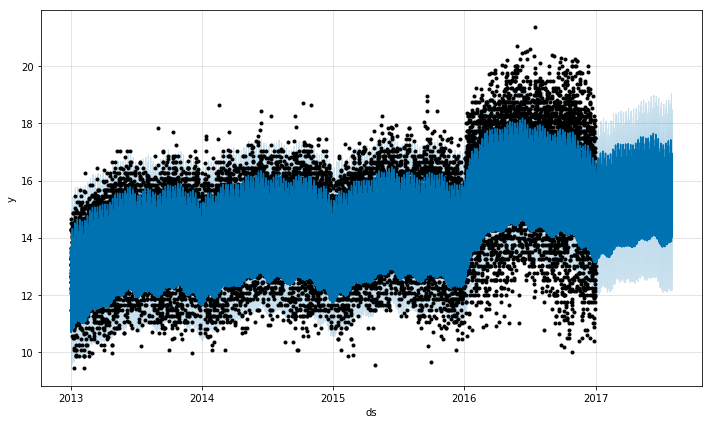

In [49]:
future_data = model.make_future_dataframe(periods=5087,freq='h')
forecast_data = model.predict(future_data)
fig=plt.figure()
model.plot(forecast_data)
plt.savefig("Plots/Forecast.png")

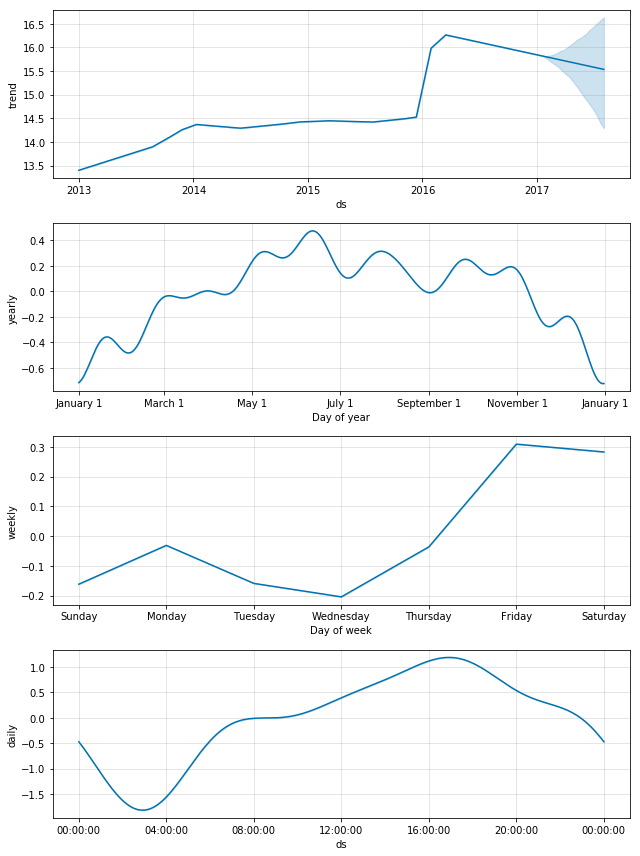

In [50]:
fig=plt.figure()
model.plot_components(forecast_data)
plt.savefig("Plots/trend plots.png")

In [51]:
forecast_data.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2013-01-01 00:00:00,13.400161,13.400161,13.400161,10.919972,13.293105,-0.473132,-0.473132,-0.473132,-1.346543,...,-1.346543,-1.346543,-1.346543,-0.158767,-0.158767,-0.158767,-0.714643,-0.714643,-0.714643,12.053619
1,2013-01-01 01:00:00,13.400249,13.400249,13.400249,10.174092,12.575502,-1.089132,-1.089132,-1.089132,-1.971948,...,-1.971948,-1.971948,-1.971948,-0.168526,-0.168526,-0.168526,-0.714290,-0.714290,-0.714290,11.428301
2,2013-01-01 02:00:00,13.400336,13.400336,13.400336,9.755151,12.076454,-1.629067,-1.629067,-1.629067,-2.520857,...,-2.520857,-2.520857,-2.520857,-0.177860,-0.177860,-0.177860,-0.713929,-0.713929,-0.713929,10.879479
3,2013-01-01 03:00:00,13.400424,13.400424,13.400424,9.410058,11.766900,-1.818780,-1.818780,-1.818780,-2.719033,...,-2.719033,-2.719033,-2.719033,-0.186692,-0.186692,-0.186692,-0.713561,-0.713561,-0.713561,10.681390
4,2013-01-01 04:00:00,13.400511,13.400511,13.400511,9.772326,12.121694,-1.560244,-1.560244,-1.560244,-2.468379,...,-2.468379,-2.468379,-2.468379,-0.194949,-0.194949,-0.194949,-0.713186,-0.713186,-0.713186,10.932133


In [52]:
actual_data=pd.read_csv("Data/test.csv")
test = actual_data[['date','hour','Fare','Trip Total','Trip Seconds']].groupby(['date','hour'],as_index=False).agg({'Fare':'median',\
                                                                                              'Trip Total':'median',\
                                                                                              'Trip Seconds':'median'})
test=test[["date","hour","Trip Total"]]
test["date_time"]=pd.to_datetime(test["date"]+" "+test["hour"].astype(str)+":00:00")
test=test.set_index(pd.DatetimeIndex(test['date_time']))
forecast_test=forecast_data[forecast_data.ds.dt.year==2017]
forecast_test=forecast_test.set_index(pd.DatetimeIndex(forecast_test['ds']))
forecast_test.head()
test["Predicted"]=forecast_test["yhat"].values
test.head()

,date,hour,Trip Total,date_time,Predicted
date_time,,,,,
2017-01-01 00:00:00,2017-01-01,0,15.250,2017-01-01 00:00:00,14.491953
2017-01-01 01:00:00,2017-01-01,1,17.125,2017-01-01 01:00:00,13.871485
2017-01-01 02:00:00,2017-01-01,2,17.500,2017-01-01 02:00:00,13.328660
2017-01-01 03:00:00,2017-01-01,3,15.450,2017-01-01 03:00:00,13.137596
2017-01-01 04:00:00,2017-01-01,4,15.750,2017-01-01 04:00:00,13.396263


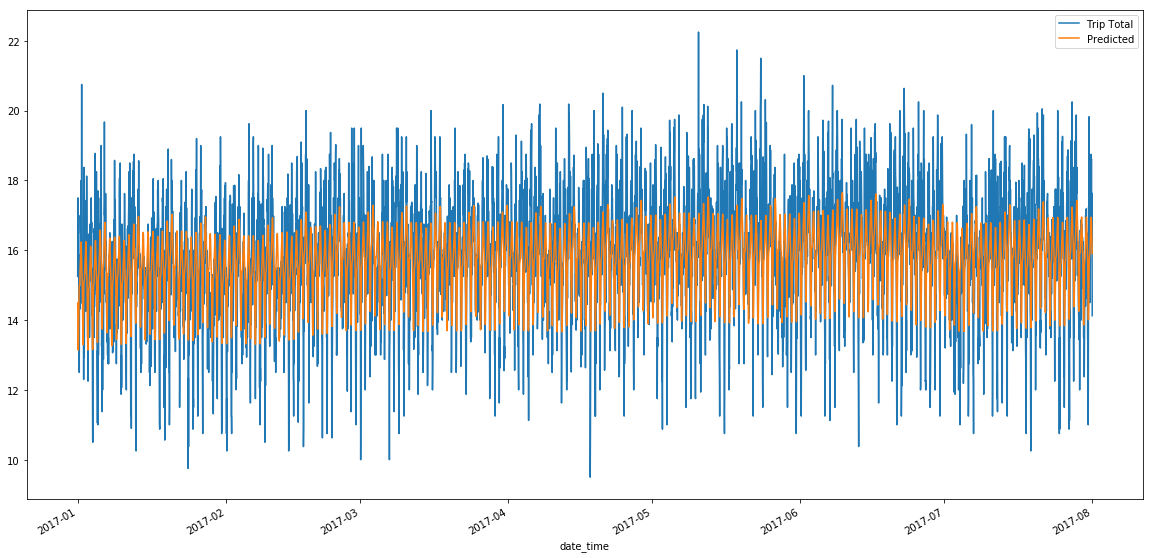

In [66]:
test[["Trip Total","Predicted"]].plot(figsize=(20,10))
plt.savefig("Plots/Prediction vs Actual.png")

In [61]:
from sklearn.metrics import mean_squared_error,r2_score
import math
err=mean_squared_error(test["Trip Total"],test["Predicted"])
print("The mean squared error between our prediction and actual values is = %f"%err)
print("RMSE = %f"%math.sqrt(err))
print("R2 Score = %f"%r2_score(test["Trip Total"],test["Predicted"]))

The mean squared error between our prediction and actual values is = 1.845792
RMSE = 1.358599
R2 Score = 0.445636
